In [ ]:
# Description: This progran uses an artifical recurrent neural network called Long Short Term Memory (LSTM)
# to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price

In [ ]:
#import the libraries 
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get the stock quote 
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300


In [ ]:
#get the number of rows and columns in the data set
df.shape

(2003, 6)

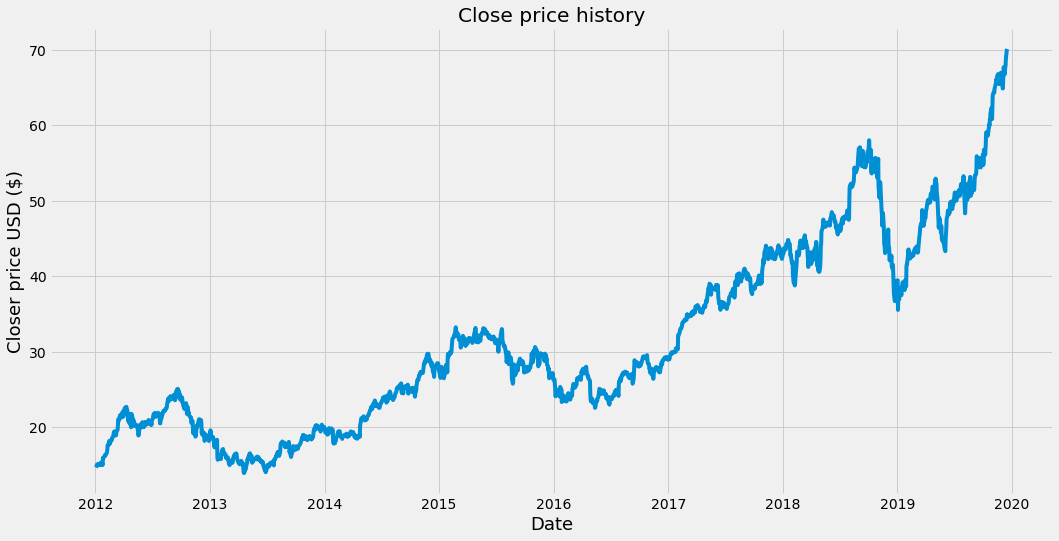

In [ ]:
#visulaize  the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history') #graph title 
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18) #x labels name
plt.ylabel('Closer price USD ($)', fontsize=18) #y labels name
plt.show()

In [ ]:
#create a new datafram with only the 'close column'

data - df.filter(['close'])
#conver the dataframe into numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

1603

In [ ]:
#scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#create the training data set
#create the scaled traning data set
train_data = scaled_data[0:training_data_len.:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  